In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

In [2]:
# Read in 1 MSun files

smol_history = pd.read_csv('1MSunData/history.data')
snap_95      = pd.read_csv('1MSunData/profile.95.data')
snap_147     = pd.read_csv('1MSunData/profile.147.data')
snap_290     = pd.read_csv('1MSunData/profile.290.data')
snap_4903    = pd.read_csv('1MSunData/profile.4903.data')
snap_5632    = pd.read_csv('1MSunData/profile.5632.data')

In [3]:
# Read in 25 MSun files

big_history = pd.read_csv('25MSunData/history.data')
snap_352    = pd.read_csv('25MSunData/profile.352.data')
snap_474    = pd.read_csv('25MSunData/profile.474.data')
snap_704    = pd.read_csv('25MSunData/profile.704.data')
snap_808    = pd.read_csv('25MSunData/profile.808.data')
snap_1116   = pd.read_csv('25MSunData/profile.1116.data')

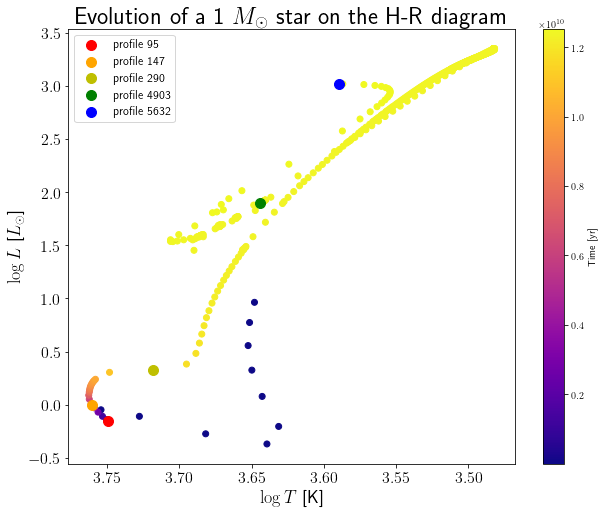

In [105]:
# H-R diagram for 1 MSun star

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sc = ax.scatter(smol_history['log_Teff'], smol_history['log_L'], c=smol_history['star_age'], cmap='plasma')

# Locations of the profiles in T-L space
ax.scatter(snap_95['logT'].iloc[-1], snap_95['logL'].iloc[-1], color='r', s=100, label='profile 95')
ax.scatter(snap_147['logT'].iloc[-1], snap_147['logL'].iloc[-1], color='orange', s=100, label='profile 147')
ax.scatter(snap_290['logT'].iloc[-1], snap_290['logL'].iloc[-1], color='y', s=100, label='profile 290')
ax.scatter(snap_4903['logT'].iloc[-1], snap_4903['logL'].iloc[-1], color='g', s=100, label='profile 4903')
ax.scatter(snap_5632['logT'].iloc[-1], snap_5632['logL'].iloc[-1], color='b', s=100, label='profile 5632')

ax.invert_xaxis()
ax.set_title(r'Evolution of a 1 $M_\odot$ star on the H-R diagram', fontsize=24)
ax.set_xlabel(r'$\log T$ [K]', fontsize=18)
ax.set_ylabel(r'$\log L$ [$L_\odot$]', fontsize=18)
ax.tick_params(labelsize=16)
ax.legend(loc=0, fontsize=12)
cb = plt.colorbar(sc)
cb.set_label('Time [yr]');

# fig.savefig('evolution.png')
# fig.savefig('evolution.pdf')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


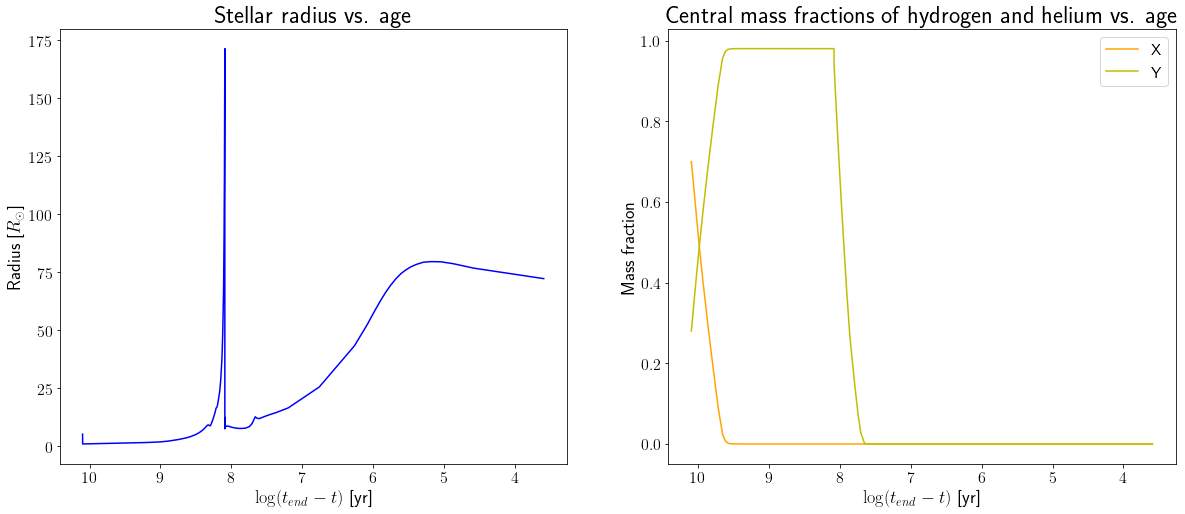

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# Evolution of stellar radius
ax[0].plot(np.log10(smol_history['star_age'].iloc[-1] - smol_history['star_age']), [10 ** logr for logr in smol_history['log_R']], color='b')
ax[0].invert_xaxis()
ax[0].set_xlabel(r'$\log(t_{end} - t)$ [yr]', fontsize=18)
ax[0].set_ylabel(r'Radius [$R_\odot$]', fontsize=18)
ax[0].set_title('Stellar radius vs. age', fontsize=24)
ax[0].tick_params(labelsize=16)

# Evolution of hydrogen & helium mass fractions
ax[1].plot(np.log10(smol_history['star_age'].iloc[-1] - smol_history['star_age']), smol_history['center_h1'], color='orange', label='X')
ax[1].plot(np.log10(smol_history['star_age'].iloc[-1] - smol_history['star_age']), smol_history['center_he4'], color='y', label='Y')
ax[1].invert_xaxis()
ax[1].set_xlabel(r'$\log(t_{end} - t)$ [yr]', fontsize=18)
ax[1].set_ylabel('Mass fraction', fontsize=18)
ax[1].set_title('Central mass fractions of hydrogen and helium vs. age', fontsize=24)
ax[1].tick_params(labelsize=16)
ax[1].legend(loc=0, fontsize=16);

# fig.savefig('radius_evol.png')
# fig.savefig('radius_evol.pdf')

In [110]:
# Calculating pressure profile of the Sun
import astropy.units as u
from astropy.constants import G

ps = [0.0]
rs = [1.0]
delta_r = -1e-5

while True:
    p = ps[-1]
    r = rs[-1]
    
    delta_p = -(4/3) * np.pi * (r * u.solRad) * G * (1.0 * u.g / (u.cm ** 3)) ** 2 * (delta_r * u.solRad)
    delta_p = delta_p.to(u.dyn / (u.cm ** 2)) / (u.dyn / (u.cm ** 2))
    delta_p = float(delta_p)
    
    new_p = p + delta_p
    new_r = r + delta_r
    ps.append(new_p)
    rs.append(new_r)
    if r <= 0.01:
        break

# Preventing DivideByZero error
ps.remove(0.0)
rs.remove(1.0)

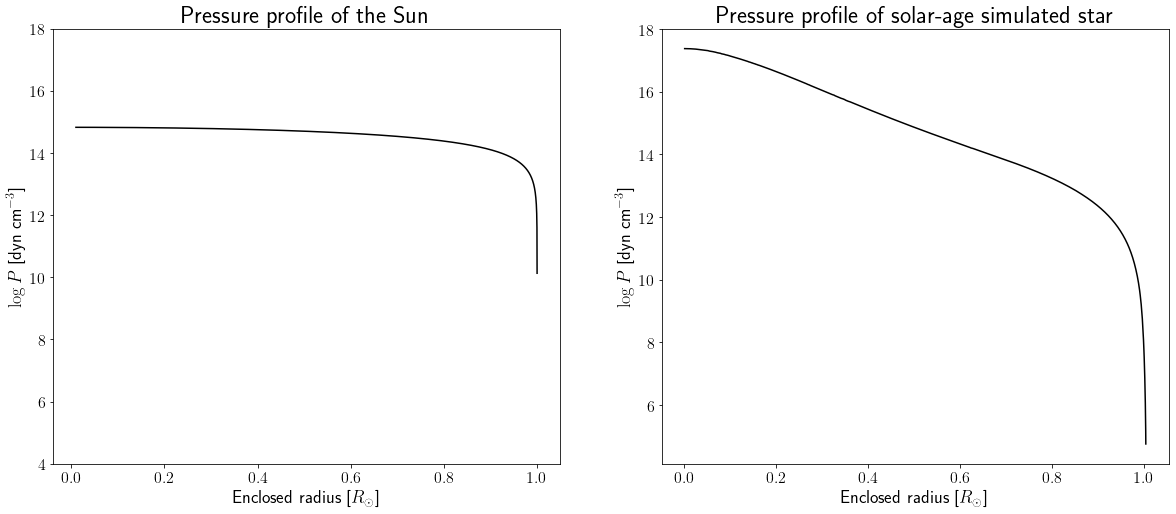

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# Pressure profile of the Sun
ax[0].plot(rs, np.log10(ps), color='k')
ax[0].set_ylim(4,18)
ax[0].set_title('Pressure profile of the Sun', fontsize=24)
ax[0].set_xlabel(r'Enclosed radius [$R_\odot$]', fontsize=18)
ax[0].set_ylabel(r'$\log P$ [dyn cm$^{-3}$]', fontsize=18)
ax[0].tick_params(labelsize=16)

# Pressure profile of simulated star
ax[1].plot(snap_147['radius'], snap_147['logP'], color='k')
ax[1].set_title('Pressure profile of solar-age simulated star', fontsize=24)
ax[1].set_xlabel(r'Enclosed radius [$R_\odot$]', fontsize=18)
ax[1].set_ylabel(r'$\log P$ [dyn cm$^{-3}$]', fontsize=18)
ax[1].tick_params(labelsize=16);

# fig.savefig('pressure_profile.png')
# fig.savefig('pressure_profile.pdf')

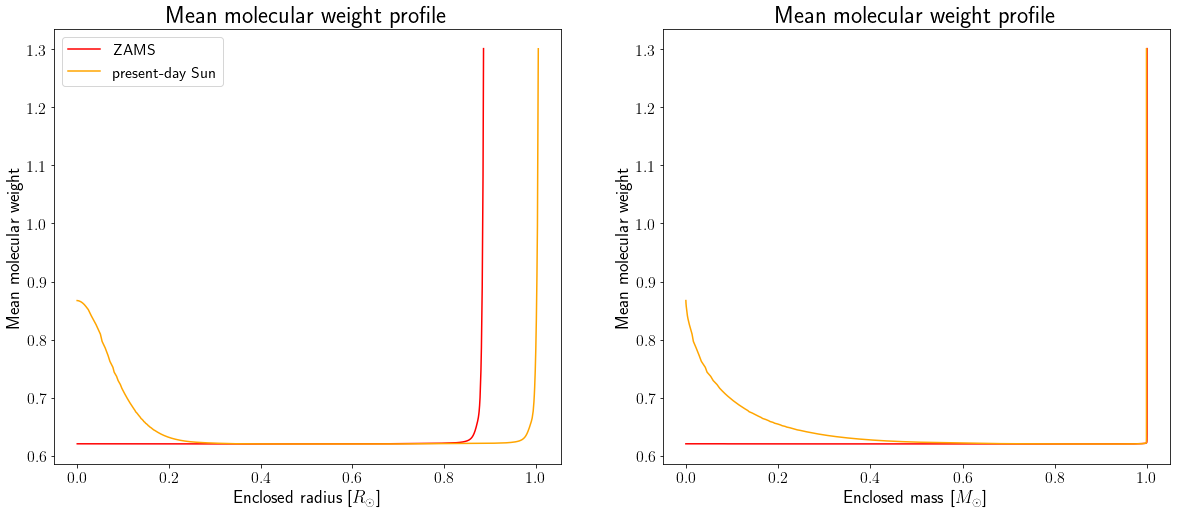

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# With respect to radius
ax[0].plot(snap_95['radius'], snap_95['mu'], color='r', label='ZAMS')
ax[0].plot(snap_147['radius'], snap_147['mu'], color='orange', label='present-day Sun')
ax[0].set_title('Mean molecular weight profile', fontsize=24)
ax[0].set_xlabel(r'Enclosed radius [$R_\odot$]', fontsize=18)
ax[0].set_ylabel('Mean molecular weight', fontsize=18)
ax[0].tick_params(labelsize=16)
ax[0].legend(loc=0, fontsize=16)

# With respect to mass
ax[1].plot(snap_95['mass'], snap_95['mu'], color='r')
ax[1].plot(snap_147['mass'], snap_147['mu'], color='orange')
ax[1].set_title('Mean molecular weight profile', fontsize=24)
ax[1].set_xlabel(r'Enclosed mass [$M_\odot$]', fontsize=18)
ax[1].set_ylabel('Mean molecular weight', fontsize=18)
ax[1].tick_params(labelsize=16);

# fig.savefig('weight_profile.png')
# fig.savefig('weight_profile.pdf')

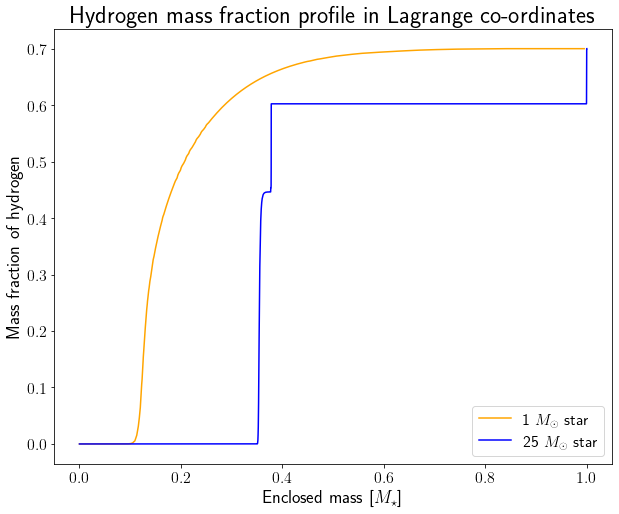

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(snap_290['mass'], snap_290['h1'], color='orange', label=r'1 $M_\odot$ star')
ax.plot(snap_474['mass'] / 25, snap_474['h1'], color='b', label=r'25 $M_\odot$ star')
ax.set_title('Hydrogen mass fraction profile in Lagrange co-ordinates', fontsize=24)
ax.set_xlabel(r'Enclosed mass [$M_\star$]', fontsize=18)
ax.set_ylabel(r'Mass fraction of hydrogen', fontsize=18)
ax.tick_params(labelsize=16)
ax.legend(loc=4, fontsize=16);

# fig.savefig('hydrogen_profiles.png')
# fig.savefig('hydrogen_profiles.pdf')

In [127]:
# Numerical integration of hydrogen mass fraction over mass of each star

smol_X2 = np.trapz(y=snap_290['h1'], x=snap_290['mass'], dx=1e-4)
big_X2  = np.trapz(y=snap_474['h1'], x=snap_474['mass'], dx=1e-4)

smol_X1 = np.trapz(y=snap_95['h1'], x=snap_95['mass'], dx=1e-4)
big_X1  = np.trapz(y=snap_352['h1'], x=snap_352['mass'], dx=1e-4)

# Proportional mass of hydrogen burned by each star
print((smol_X1 - smol_X2)/smol_X1, (big_X1 - big_X2)/big_X1)

print(smol_X1, big_X1/25)
print(smol_X2, big_X2/25)

0.197546965348481 0.4499872477278687
0.6998622121720091 0.6998625233639596
0.5616065559953539 0.3849333126875302


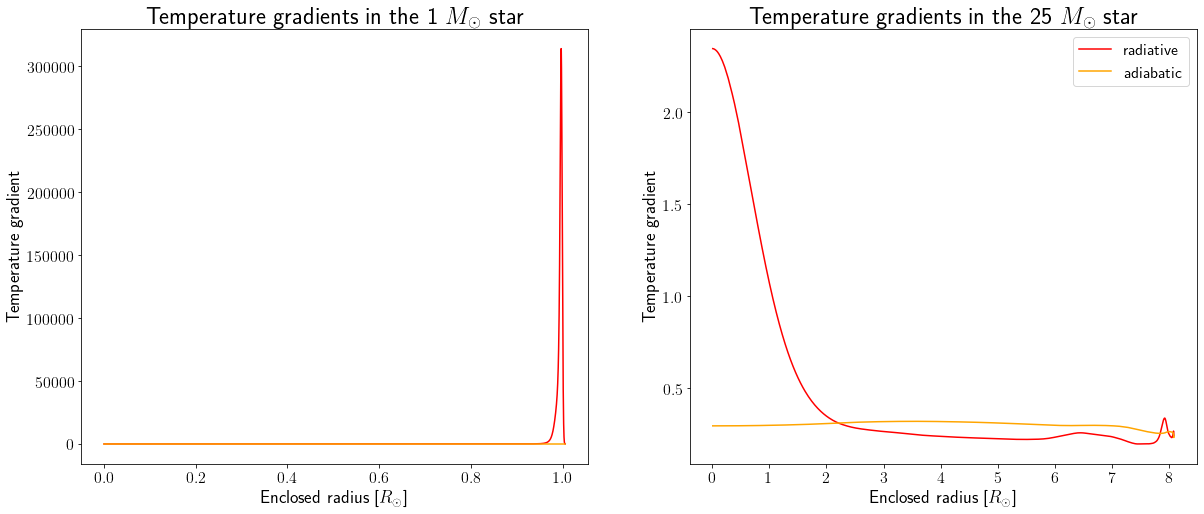

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# Temperature gradients in the 1 MSun star
ax[0].plot(snap_147['radius'], snap_147['gradr'], color='r')
ax[0].plot(snap_147['radius'], snap_147['grada'], color='orange')
ax[0].set_title(r'Temperature gradients in the 1 $M_\odot$ star', fontsize=24)
ax[0].set_xlabel(r'Enclosed radius [$R_\odot$]', fontsize=18)
ax[0].set_ylabel('Temperature gradient', fontsize=18)
ax[0].tick_params(labelsize=16)

# Temperature gradients in the 25 MSun star
ax[1].plot(snap_352['radius'], snap_352['gradr'], color='r', label='radiative')
ax[1].plot(snap_352['radius'], snap_352['grada'], color='orange', label='adiabatic')
ax[1].set_title(r'Temperature gradients in the 25 $M_\odot$ star', fontsize=24)
ax[1].set_xlabel(r'Enclosed radius [$R_\odot$]', fontsize=18)
ax[1].set_ylabel('Temperature gradient', fontsize=18)
ax[1].tick_params(labelsize=16)
ax[1].legend(loc=0, fontsize=16);

# fig.savefig('tempgrads.png')
# fig.savefig('tempgrads.pdf')

In [99]:
# Numerical integration of hydrogen and helium mass fraction over mass of each final star

smol_XY2 = np.trapz(y=snap_5632['h1']+snap_5632['he4'], x=snap_5632['mass'], dx=1e-4)
big_XY2  = np.trapz(y=snap_1116['h1']+snap_1116['he4'], x=snap_1116['mass'], dx=1e-4)

smol_XY1 = np.trapz(y=snap_95['h1']+snap_95['he4'], x=snap_95['mass'], dx=1e-4)
big_XY1  = np.trapz(y=snap_352['h1']+snap_352['he4'], x=snap_352['mass'], dx=1e-4)

# Mass of metals generated by each star (in MSun)
smol_delta_Z = smol_XY1 - smol_XY2
big_delta_Z  = big_XY1 - big_XY2
print(smol_delta_Z, big_delta_Z)

0.9260029926279918 6.596753749656749
